In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

### Definiujemy "Superman year" jako taki, w którym ról Superman było więcej niż Batman. Ile lat w historii filmu było "Superman years"?

In [5]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [6]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
12


### Ile lat było "Batman years", na analogicznych zasadach?

In [7]:
print('Batman years:')
print(len(d[d < 0.0]))

Batman years:
24


### Wydrukuj liczbę ról aktorów w każdym roku i liczbę ról aktorekw kazdym roku w całej historii filmu (wydruk liniowy).

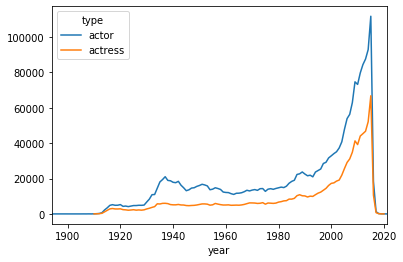

In [8]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

### Wydrukuj te same dane, ale z rodzajem wydruku 'area'.

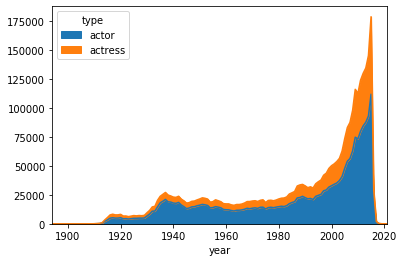

In [9]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')

### Wydrukuj różnicę między liczbą ról aktorów w każdym roku i liczbę ról aktorek w każdym roku w całej historii filmu.

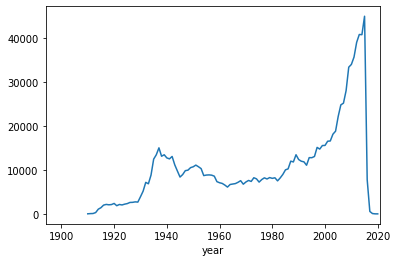

In [10]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()

### Wydrukuj frakcję ról, które były rolami 'actor' w kazdym roku w historii filmu.

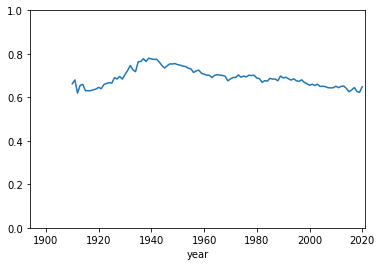

In [11]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Wydrukuj frakcję ról drugoplanowych (n=2), które były rolami 'actor' w kazdym roku historii filmu.

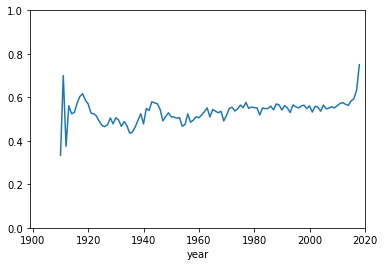

In [12]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Utwórz wydruk z liniami dla każdej wartości od n=1 do n=3, gdzie linie pokazują jakie frakcje tak rangowanych ról były 'actor' dla każdego roku w historii filmu.

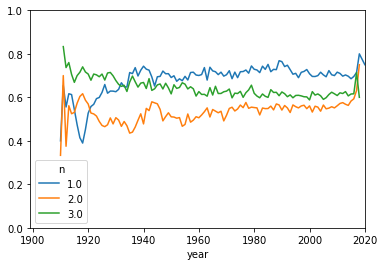

In [13]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])

## Koniec część 4